# Sentiments Over Time

SAAS DF Education HW 1

Is this book a thriller? How much happier will you be after you read a book? Let's find out! 😏

## Imports

In [22]:
!pip install nltk
!pip install numpy
!pip install matplotlib

/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin
/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin
/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin


In [24]:
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aathreyakadambi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Getting Sentiments

In [4]:
# Generated by GPT ;)
# Sample text
text = "I absolutely love this new phone! It's amazing."

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Get sentiment scores
sentiment = sid.polarity_scores(text)

print(sentiment)

{'neg': 0.0, 'neu': 0.368, 'pos': 0.632, 'compound': 0.862}


From this example above, you can see how to get the sentiment of a sentence! Simply use `sid.polarity_scores(...)`.

## Loading in Data

Let's load in the data! In Python, you can read in data from files with `open`:

In [5]:
DATA_DIR = "./raw_data/" # the location of our raw data

In [10]:
# load in alice's adventures in wonderland (AAIW)
with open(DATA_DIR + 'aaiw.txt', 'r') as in_file:
    aaiw = in_file.read()

# load in great expectations
with open(DATA_DIR + 'great-expectations.txt', 'r') as in_file:
    great_exp = in_file.read()

In [9]:
aaiw[:100] # first 100 characters of AAIW

"\ufeffThe Project Gutenberg eBook of Alice's Adventures in Wonderland\n    \nThis ebook is for the use of a"

In [11]:
great_exp[:100] # first 100 characters of Great Expectations

'\ufeffThe Project Gutenberg eBook of Great Expectations\n    \nThis ebook is for the use of anyone anywhere'

## Chunking the Text

To analyze the sentiment over time, we need several sentiment scores, over the course of the book. There are many ways to do this:
- do sentiment by word,
- do sentiment by sentence,
- do sentiment by paragraph,
- do you have any other ideas?

VADER, the tool that we are using from NLTK to compute sentiments, was originally designed to be used on short sentences, so we'll go with that. Let's break our book into sentences.

In [47]:
book = great_exp # change this to whatever book you want!

# split the book by sentences, check this out, but don't worry too much if you don't get it!
# this is called regex, or "regular expressions". It's an excellent way to search through or filter through strings.
split_book = re.split(r'[.!?]', book)
sentences = [sentence.strip() for sentence in split_book if sentence.strip()]
sentences

['\ufeffThe Project Gutenberg eBook of Great Expectations\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever',
 'You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www',
 'gutenberg',
 'org',
 'If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook',
 'Title: Great Expectations\n\nAuthor: Charles Dickens\n\nRelease date: July 1, 1998 [eBook #1400]\n                Most recently updated: December 17, 2024\n\nLanguage: English\n\nCredits: An Anonymous Volunteer and David Widger\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***\n\n[Illustration]\n\n\n\n\nGreat Expectations\n\n[1867 Edition]\n\nby Charles Dickens\n\n\nContents\n\n Chapter I',
 'Chapter II',
 'Chapter III',
 'Chapter IV',
 'Chapter 

It isn't perfect, but it'll do for this exercise! In a full fledged project, you should do more work to clean data and look through it to make sure it's appropriate for your analysis.

Fill in the "list comprehension" below to get the sentiment of each sentence! As a hint, look at the first part of this notebook again, and maybe use the "compound" score. You can access the compound score from the dictionary by indexing: `...["compound"]`

In [ ]:
# get the sentiments
sentiments = [ ... for sentence in sentences ]
sentiments

[0.5423,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.948,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0772,
 0.0,
 0.3612,
 -0.1531,
 -0.296,
 0.4404,
 0.0,
 0.5423,
 -0.9325,
 0.0,
 -0.7845,
 -0.7357,
 0.2732,
 -0.6486,
 -0.6124,
 0.0,
 -0.6705,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1779,
 0.0,
 0.2648,
 0.0,
 -0.4023,
 -0.6249,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2263,
 0.0,
 -0.1779,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4939,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4005,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.6124,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7425,
 0.0,
 -0.34,
 0.0,
 0.0,
 -0.6808,
 -0.25,
 -0.1027,
 0.0

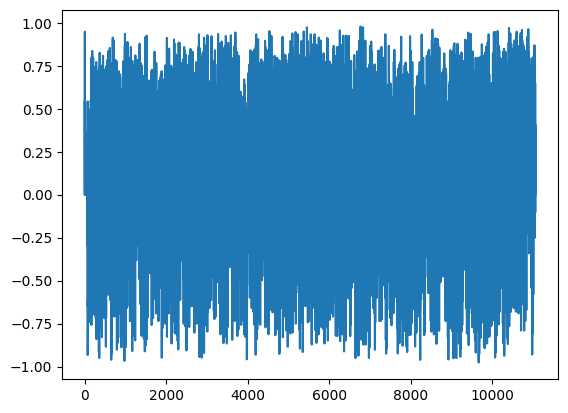

In [53]:
plt.plot(sentiments)

Wow, that's really noisy!

## Derivatives and Integrals

Try taking differences of this series of sentiment scores over the course of the book. How can you interpret this "derivative" of the sentiment?

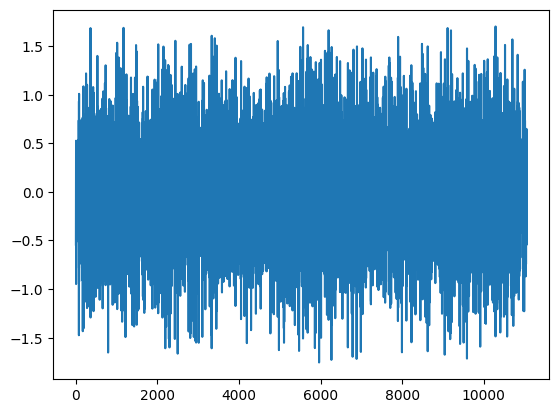

In [54]:
normal_sent = ...
shifted_right = ...
# we convert to numpy arrays so we can subtract!
diff = np.array(shifted_right) - np.array(normal_sent)
plt.plot(diff)

This is too noisy to get a good feel for... let's take "moving averages". This "smoothens the data", by essentially averaging every few data points.

In [55]:
def moving_average(arr, window_size):
    return np.array([np.mean(arr[i:i+window_size]) for i in range(len(arr) - window_size + 1)])

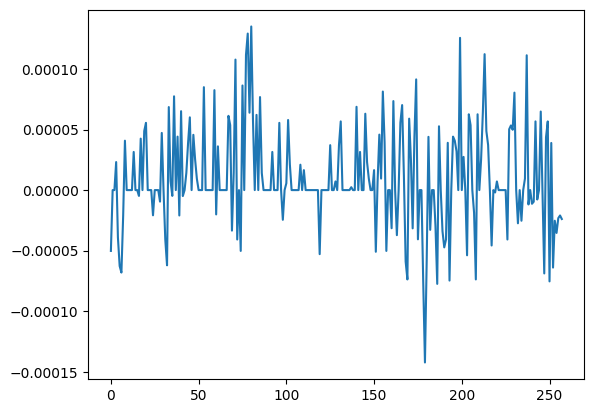

In [67]:
# hints:
# use 1700 for AAIW
# use 10800 for Great Expectations
plt.plot(moving_average(diff, 10800)) # you might have to change 1700.

Interesting! Can you interpret anything from this? Do you have any hypotheses about the content of the book? Note, this is extremely open ended, and there isn't really an expected answer here.

Let's also try something else we didn't really talk about: integrating! Lets simply take partial sums of the first $k$ sentiment values:

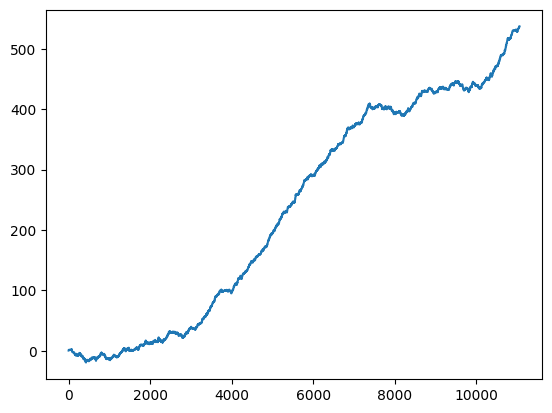

In [68]:
integrated = [ sentiments[0] ]
for i in range(1, len(sentiments)):
    integrated.append(integrated[-1] + sentiments[i])

plt.plot(integrated)

Very cool! What do you think of this plot? I wonder what happens roughly between sentences 1200 and 1600 for AAIW? Great Expectations looks like it gets happier and happier! Does that sound right?! Take a closer look at the data, play around with integration and differentiation, and have some fun with it!

What happens when you differentiate the integral (take the differences of the partial sums)?